## now-casting

> now + forecasting : 예측은 과거와 현재의 데이터를 기반으로 예측하는 과정입니다. 나중에 일어나는 일과 비교할 수 있습니다. 예를 들어, 회사는 다음 해의 수익을 추정한 다음 실제 결과와 비교할 수 있습니다. 예측은 비슷하지만 더 일반적인 용어입니다.

- 인구 데이터, LTE signal 활용해서 데이터 수집, 집계구 > 행정동 > 자치구 
- pandas pivot을 활용해 데이터 변수 (열) 변경, long format, 한 행으로 -> wide format

### pandas pivot
- pivot table에서 아래 값들을 차례대로 정의 해 주면 된다. 
- long format에서 행의 index는 "기준일 ID, 시간대구분" (2개)
- 자치구를 컬럼으로
- 시간과 컬럼의 조합은 총 인구 수 


In [82]:
# d3 ex1-1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # jupyter output 여러개 한 꺼 번에 보기! 

DATA_PATH: str = "./datas/"

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

os.getcwd()
fname_list = os.listdir(DATA_PATH) # 해당 directory에 file name을 모두 불러와 List로 저장
fname_list
tmp = pd.read_csv(DATA_PATH + fname_list[3], index_col = False, encoding='utf-8')
rdata = tmp.iloc[:,0:4]
dong_code = rdata["행정동코드"].unique() # 유일 한 값만 (distinct)
print("행정동 424개 >>", len(dong_code)) # 행정동 424개 -> 이 동 코드가 열이 될 것 이다.

'/Users/nuung/Desktop/CodingStudy/seoul-data'

['code_pre.csv',
 'sample.csv',
 'dong_code.csv',
 'LOCAL_PEOPLE_DONG_202207.csv',
 'data.shp',
 '1인가구.csv']

행정동 424개 >> 424


In [83]:
# d3 ex1-2
# 데이터 -> 롱포멧에서 와이드 포멧으로 가져오기 

# pd.pivot 을 이용하여 행정동을 열로 표시하고 총생활인구를 값으로
rdata_w = pd.pivot(rdata, index = ["기준일ID", "시간대구분"], columns="행정동코드", values='총생활인구수')

rdata_w.head()
rdata_w.reset_index(inplace=True) # 시간 정보는 index, 기준일 ID에 있음 -> 데이터가 아닌데, 데이터로 넣기! reset index 활용하기
rdata_w.head()
rdata_w.columns

n, p = rdata_w.shape # return 튜플이라 차례대로 받음
print("rdata_w.shape >>", rdata_w.shape)


행정동코드             11110515    11110530   11110540    11110550    11110560  \
기준일ID    시간대구분                                                              
20220701 0      15493.6613  13803.8562  3556.0955  15666.3888  18343.0956   
         1      15436.3114  13363.3586  3566.0568  15706.5205  18469.1254   
         2      15453.4542  12960.5562  3601.1315  15832.5348  18545.2622   
         3      15399.0999  12909.9731  3622.0879  15512.3667  18934.2292   
         4      15424.0821  13076.1778  3639.7238  15564.8546  19005.2006   

행정동코드            11110570   11110580   11110600    11110615   11110630  ...  \
기준일ID    시간대구분                                                          ...   
20220701 0      7883.9765  6896.0238  5040.5148  25492.6458  9593.7203  ...   
         1      7902.2256  6895.8945  4988.6425  24244.3478  9447.5752  ...   
         2      7939.5217  6843.1005  4959.8055  23392.3770  9328.1665  ...   
         3      7802.2017  7064.0272  4992.2910  22818.1296  9397.1217  ...   
         4      7932.6257  7039.9773  4973.2659  23358.8214  9581.9405  ...   

행정동코드             11740590    11740600    11740610    11740620    11740640  \
기준일ID    시간대구분                                                               
20220701 0      13289.8792  34678.3597  44738.9648  30583.3916  25082.5219   
         1      13595.7130  35794.0091  45081.9268  30291.4148  24739.9308   
         2      13801.1402  36179.2377  44993.8665  30498.7625  24752.3503   
         3      13813.4722  36467.0110  45137.7525  30388.8403  24818.5453   
         4      14222.5935  37093.5187  45314.7473  30460.7942  24542.7990   

행정동코드             11740650    11740660    11740685   11740690    11740700  
기준일ID    시간대구분                                                             
20220701 0      27035.5559  28136.3344  59596.5180  5186.1455  28326.9732  
         1      27385.5232  28204.8507  59435.4399  5203.1909  28588.4483  
         2      27388.0900  27948.5386  59624.3100  5202.5068  28540.5417  
         3      27355.9010  27870.7676  59374.3234  5151.8086  28668.1821  
         4      27155.6485  28110.8061  59144.8653  5124.4839  28791.3087  

[5 rows x 424 columns]

행정동코드,기준일ID,시간대구분,11110515,11110530,11110540,11110550,11110560,11110570,11110580,11110600,...,11740590,11740600,11740610,11740620,11740640,11740650,11740660,11740685,11740690,11740700
0,20220701,0,15493.6613,13803.8562,3556.0955,15666.3888,18343.0956,7883.9765,6896.0238,5040.5148,...,13289.8792,34678.3597,44738.9648,30583.3916,25082.5219,27035.5559,28136.3344,59596.5180,5186.1455,28326.9732
1,20220701,1,15436.3114,13363.3586,3566.0568,15706.5205,18469.1254,7902.2256,6895.8945,4988.6425,...,13595.7130,35794.0091,45081.9268,30291.4148,24739.9308,27385.5232,28204.8507,59435.4399,5203.1909,28588.4483
2,20220701,2,15453.4542,12960.5562,3601.1315,15832.5348,18545.2622,7939.5217,6843.1005,4959.8055,...,13801.1402,36179.2377,44993.8665,30498.7625,24752.3503,27388.0900,27948.5386,59624.3100,5202.5068,28540.5417
3,20220701,3,15399.0999,12909.9731,3622.0879,15512.3667,18934.2292,7802.2017,7064.0272,4992.2910,...,13813.4722,36467.0110,45137.7525,30388.8403,24818.5453,27355.9010,27870.7676,59374.3234,5151.8086,28668.1821
4,20220701,4,15424.0821,13076.1778,3639.7238,15564.8546,19005.2006,7932.6257,7039.9773,4973.2659,...,14222.5935,37093.5187,45314.7473,30460.7942,24542.7990,27155.6485,28110.8061,59144.8653,5124.4839,28791.3087


Index([ '기준일ID',  '시간대구분', 11110515, 11110530, 11110540, 11110550, 11110560,
       11110570, 11110580, 11110600,
       ...
       11740590, 11740600, 11740610, 11740620, 11740640, 11740650, 11740660,
       11740685, 11740690, 11740700],
      dtype='object', name='행정동코드', length=426)

rdata_w.shape >> (744, 426)


### 시계열, 시간 관련 예측 모델

- 장기 예측 모델에 대한 다양한 변수 생각
- X가 현재, Y가 4일후 일 때

In [84]:

# d3 ex1-3
# x, y 형태로 만들어야 한다

# 시간에 대한 계산 (특정일 이전 시간대를 검색하여 지우기 등..), 
# 현재 시간정보의 확인
# rdata_w['기준일ID']
# rdata_w['시간대구분']

# type이 date type이 아님, 두 시간을 string으로 합친후에 시간으로 변경하자
# https://ssamko.tistory.com/6
# '정수 3자리:{0:03d},{1:03d}'.format(123,12) # str formating
# '{0:02d}'.format(0)

# 실제 데이터 대상으로, inline for loop를 활용한 casting
tmp1 = [ str(i) for i in list(rdata_w['기준일ID'])]  
tmp2 = ['{0:02d}'.format(i) for i in list(rdata_w["시간대구분"])]

# tmp1와 tmp2의 원소 하나씩 (순서대로) 튜플로 만들어서 준다
tmp3 = [i + j for i,j in zip(tmp1, tmp2)] # 여기서 "+" 는 str 이어 붙이기 연산임
tmp3[:10]
tmp3 = pd.to_datetime(tmp3, format ="%Y%m%d%H") # 실제 str to datetime으로 casting - https://hiio.tistory.com/30
rdata_w["date"] = tmp3 # 참고로 rdata_w["date"]의 type과 tmp3 의 type이 다르다. 자동 casting이 되어서 저장이 된다.
rdata_w, type(rdata_w["date"]) 
type(rdata_w["date"][0]), type(tmp3[0]) # 근데 원시 자료 형, 해당 엘리먼트의 type은 tmp3의 type과 동일하다

rdata_w.shape
# codes, uniques = rdata_w['기준일ID'].factorize()


['2022070100',
 '2022070101',
 '2022070102',
 '2022070103',
 '2022070104',
 '2022070105',
 '2022070106',
 '2022070107',
 '2022070108',
 '2022070109']

(행정동코드     기준일ID  시간대구분    11110515    11110530   11110540    11110550  \
 0      20220701      0  15493.6613  13803.8562  3556.0955  15666.3888   
 1      20220701      1  15436.3114  13363.3586  3566.0568  15706.5205   
 2      20220701      2  15453.4542  12960.5562  3601.1315  15832.5348   
 3      20220701      3  15399.0999  12909.9731  3622.0879  15512.3667   
 4      20220701      4  15424.0821  13076.1778  3639.7238  15564.8546   
 ..          ...    ...         ...         ...        ...         ...   
 739    20220731     19  14603.1943  19535.8167  3864.1890  13457.7423   
 740    20220731     20  14271.1366  18175.2978  3350.3809  13726.4775   
 741    20220731     21  14124.3408  17163.5473  3146.9393  14057.0995   
 742    20220731     22  14121.0851  15738.0506  3077.0791  14578.4082   
 743    20220731     23  14961.9251  12678.2262  3298.0251  14342.6871   
 
 행정동코드    11110560   11110570   11110580   11110600  ...    11740600  \
 0      18343.0956  7883.9765  6896.02

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

(744, 427)

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<BarContainer object of 424 artists>

11680640

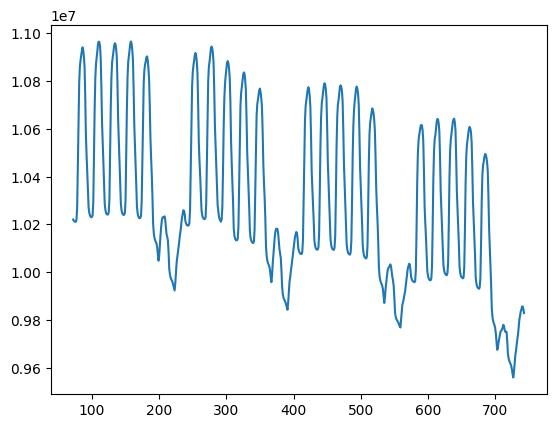

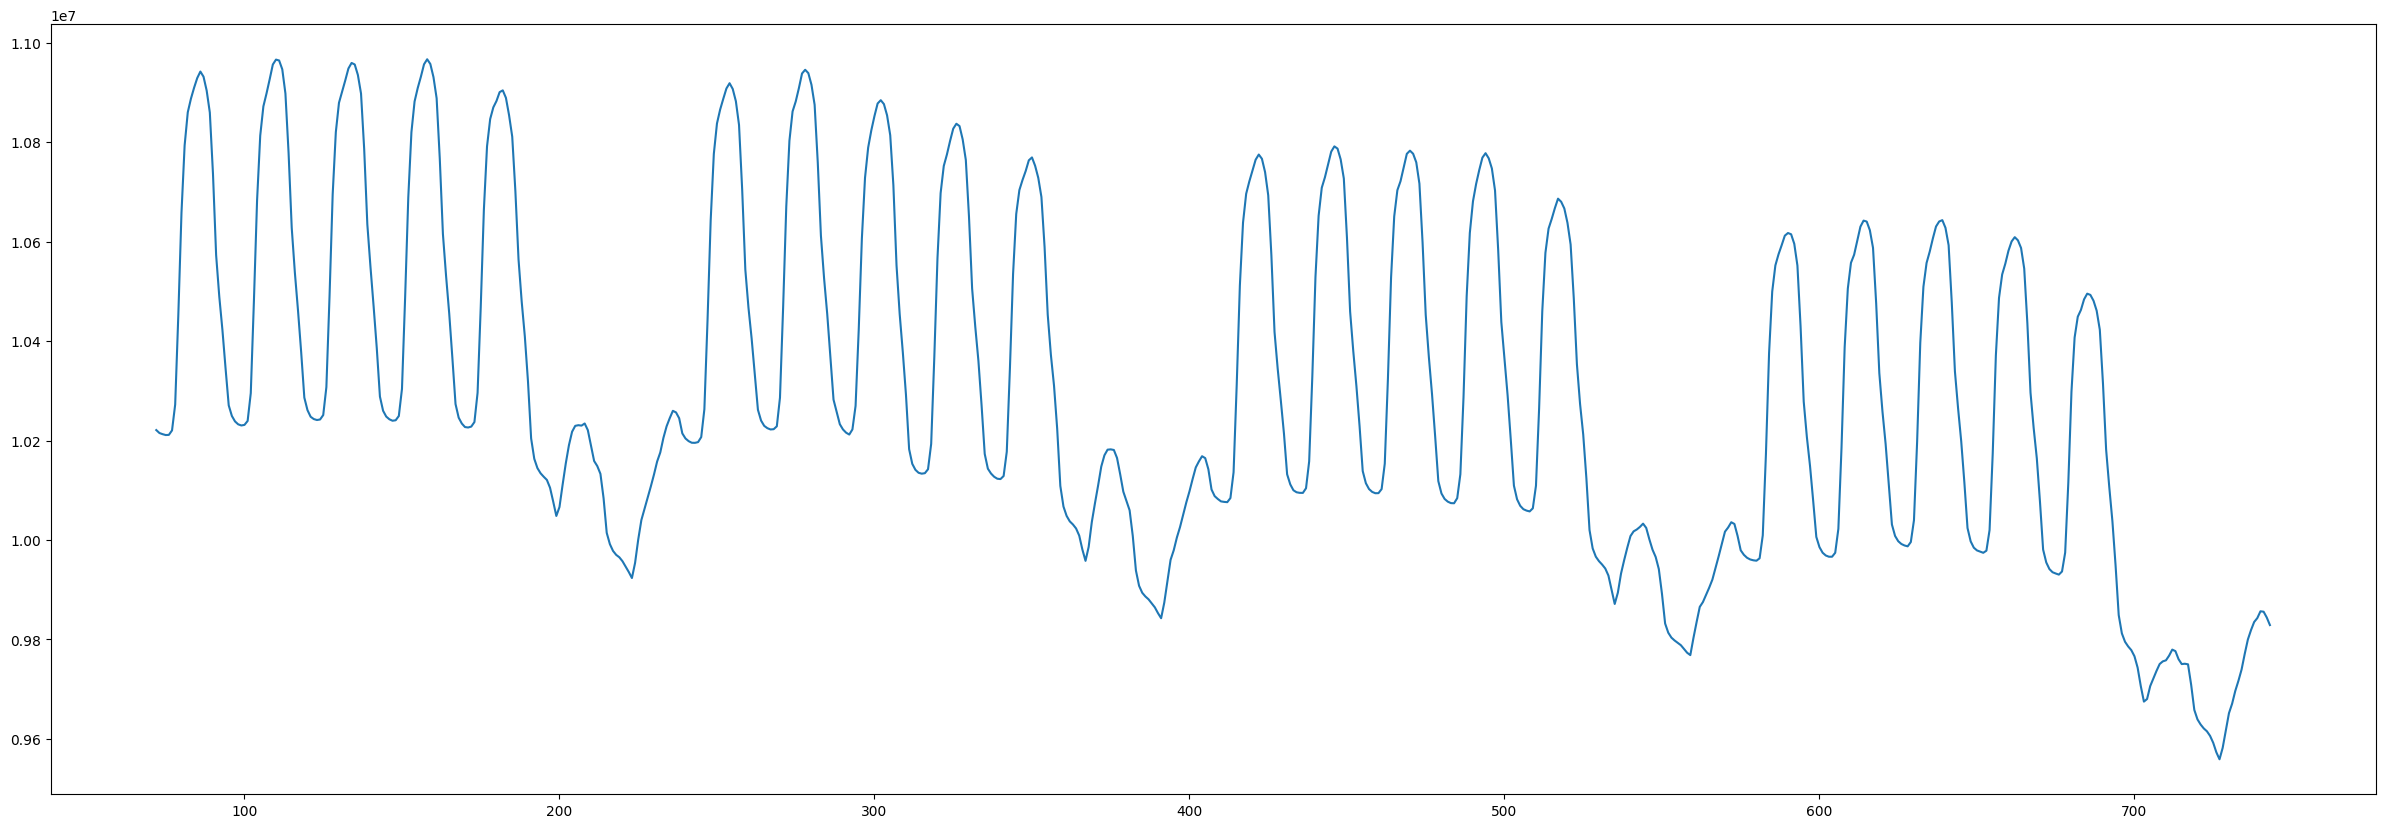

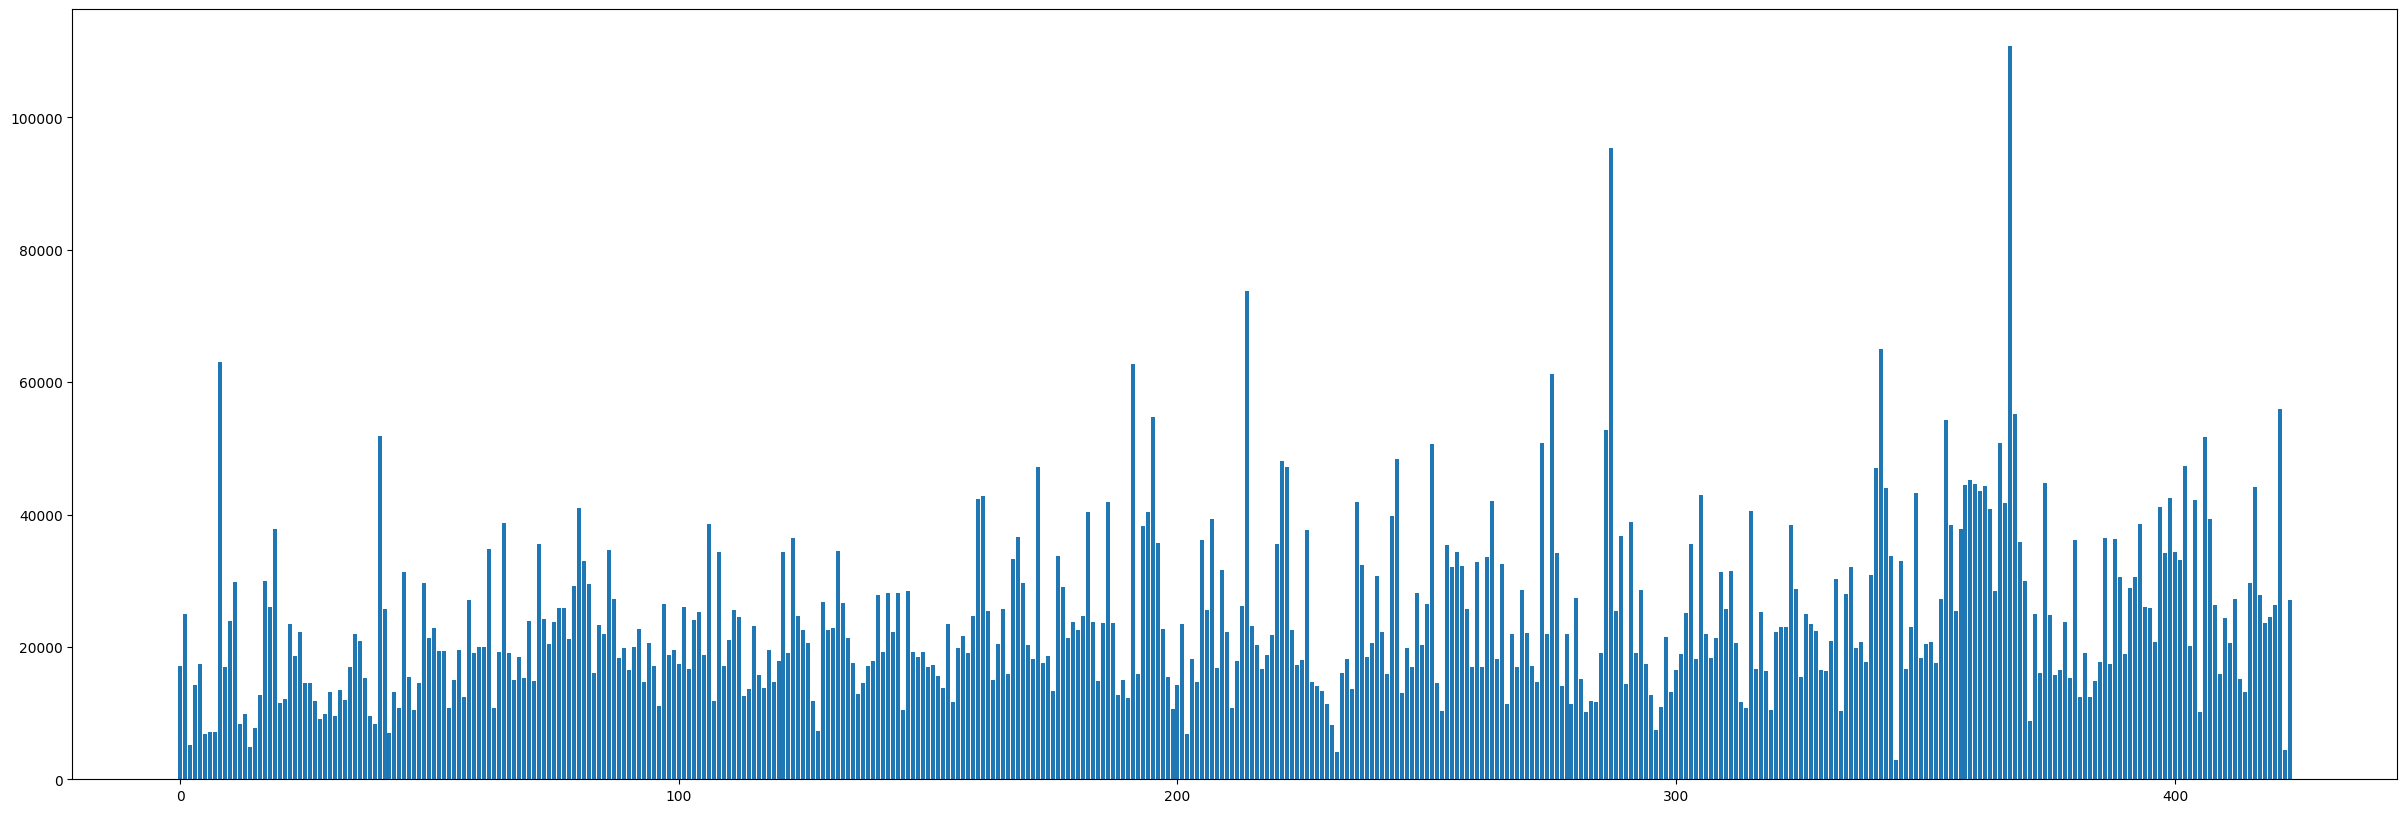

In [85]:

# d3 ex1-4
# slicing time
v = pd.to_datetime("2022070400", format ="%Y%m%d%H") # 찾고 싶은 날 세팅 (str to datetime으로 type을 맞춰줘야함)
idx = (tmp3 >= v) # tmp3 는 위에서 DATA로 부터 str to datetime으로 casting 한 list 이다.
# idx # tmp3에서 날짜 v 보다 같거나 큰 (뒷 날짜의) 아이들의 index position만 가져오기 위해 true로 세팅하기

n = sum(idx) # 그 개수 체크

idx_c = np.repeat(True, rdata_w.shape[1])
idx_c[0:2] = np.array([False, False]) # 앞에 2개만 False로 세팅
# idx_c

y = rdata_w.loc[idx,idx_c]
x = rdata_w.iloc[0:y.shape[0],:]
# y.shape # 7월 31일 24시까지 유동인구 
# x.shape


# 총인구 확인해보기
# 일별 유동인구의 수 변화 
y1 = y.drop("date", axis = 1)
total_pop_y = y1.sum(axis = 1)

plt.plot(total_pop_y)
plt.figure(figsize=(30,10))
plt.plot(total_pop_y)


# 행정동별  최대인구
total_pop_ys = y1.mean(axis = 0)
plt.figure(figsize=(30,10))
# plt.plot(total_pop_ys)
plt.bar(range(len(total_pop_ys)), total_pop_ys)
total_pop_ys.idxmax()

### df.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

```
labels : 삭제할 레이블명입니다. axis를 지정해주어야합니다.
axis : {0 : index / 1 : columns} labels인수를 사용할경우 지정할 축입니다.
index : 인덱스명을 입력해서 바로 삭제를 할 수 있습니다.
columns : 컬럼명을 입력해서 바로 삭제를 할 수 있습니다.
level : 멀티인덱스의 경우 레벨을 지정해서 진행할 수 있습니다.
inplace : 원본을 변경할지 여부입니다. True일경우 원본이 변경됩니다.
errors : 삭제할 레이블을 찾지 못할경우 오류를 띄울지 여부입니다. ignore할 경우 존재하는 레이블만 삭제됩니다.
※ axis=0 + labels 는 index인수와 역할이 같고 axis=1 + labels는 columns와 역할이 같습니다.
```


In [86]:

# d3 ex1-5
# 행정동 코드 확인하기
col_index = pd.read_csv(DATA_PATH + fname_list[2], nrows = 2, header = None, encoding='cp949')
district_code_info = pd.read_csv(DATA_PATH + fname_list[2], skiprows=1, encoding='cp949')
tmp = []
for i in range(district_code_info.shape[0]):
    v = district_code_info['CT_NM'][i] + " " + district_code_info['H_DNG_NM'][i] 
    tmp.append(v)
tmp
district_code_info['district'] = tmp
district_code_info.head()

max_idx = total_pop_ys.idxmax()
idx = (district_code_info['H_DNG_CD'] == max_idx)
if sum(idx)>=1:
    print(district_code_info['district'][idx])
else:
    print('찾은 행정동 코드 '+ str(max_idx) +  '가 DB에 없습니다. ')

    
# 숫자 객체를 다룰때 numpy로 변환후에 사용
np.eye(3,2)
np.identity(3)
np.empty((3,3))

    

['종로구 사직동',
 '종로구 삼청동',
 '종로구 부암동',
 '종로구 평창동',
 '종로구 무악동',
 '종로구 교남동',
 '종로구 가회동',
 '종로구 종로1.2.3.4가동',
 '종로구 종로5.6가동',
 '종로구 이화동',
 '종로구 창신1동',
 '종로구 창신2동',
 '종로구 창신3동',
 '종로구 숭인1동',
 '종로구 숭인2동',
 '종로구 청운효자동',
 '종로구 혜화동',
 '중구 소공동',
 '중구 회현동',
 '중구 명동',
 '중구 필동',
 '중구 장충동',
 '중구 광희동',
 '중구 을지로동',
 '중구 신당5동',
 '중구 황학동',
 '중구 중림동',
 '중구 신당동',
 '중구 다산동',
 '중구 약수동',
 '중구 청구동',
 '중구 동화동',
 '용산구 후암동',
 '용산구 용산2가동',
 '용산구 남영동',
 '용산구 원효로2동',
 '용산구 효창동',
 '용산구 용문동',
 '용산구 이촌1동',
 '용산구 이촌2동',
 '용산구 이태원1동',
 '용산구 이태원2동',
 '용산구 서빙고동',
 '용산구 보광동',
 '용산구 청파동',
 '용산구 원효로1동',
 '용산구 한강로동',
 '용산구 한남동',
 '성동구 왕십리2동',
 '성동구 마장동',
 '성동구 사근동',
 '성동구 행당1동',
 '성동구 행당2동',
 '성동구 응봉동',
 '성동구 금호1가동',
 '성동구 금호4가동',
 '성동구 성수1가1동',
 '성동구 성수1가2동',
 '성동구 성수2가1동',
 '성동구 성수2가3동',
 '성동구 송정동',
 '성동구 용답동',
 '성동구 왕십리도선동',
 '성동구 금호2.3가동',
 '성동구 옥수동',
 '광진구 화양동',
 '광진구 군자동',
 '광진구 중곡1동',
 '광진구 중곡2동',
 '광진구 중곡3동',
 '광진구 중곡4동',
 '광진구 능동',
 '광진구 구의1동',
 '광진구 구의2동',
 '광진구 구의3동',
 '광진구 광장동',
 '광진구 자양1동',
 '광진구 자양2동',
 '광진구 자양3동'

,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM,district
0,1101053,11110530,서울,종로구,사직동,종로구 사직동
1,1101054,11110540,서울,종로구,삼청동,종로구 삼청동
2,1101055,11110550,서울,종로구,부암동,종로구 부암동
3,1101056,11110560,서울,종로구,평창동,종로구 평창동
4,1101057,11110570,서울,종로구,무악동,종로구 무악동


364    강남구 역삼1동
Name: district, dtype: object


array([[1., 0.],
       [0., 1.],
       [0., 0.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [88]:

# d3 ex1-6, [ ex1-4 ] 확인하기
# 4일전 인구정보 저장하기
x.columns[2:426]
len(x.columns[2:426].unique())
pop = np.array(x[x.columns[2:426]])
# pop.shape
pop_index = list( x.columns[2:426] )

# 날짜를 숫자벡터로 변경하기 - 날짜에서 요일 추출 
# weekday index
# mon to sun: 0 to 6 
weekday = [ x['date'][i].dayofweek for i in range(n)]

# 1을 채워서 더미백터로 만들기
weekday_mat = np.zeros(shape = (n,7))
for i, j in zip(range(n), weekday):
    weekday_mat[i,j] = 1

weekday_mat
# weekday_mat.shape
weekday_index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']


# 시간을 숫자벡터로 변경하기
hour = x['시간대구분'] 
hour_mat = np.zeros(shape = (n,24))
for i, j in zip(range(n),hour):
    hour_mat[i,j] = 1
hour_mat.shape
hour_index = [str(i) + 'h' for i in range(24)]


# predictor 데이터 합치기 (4일전 인구, 요일, 시간)
x_index = pop_index + weekday_index + hour_index
x_ = np.concatenate([pop, weekday_mat, hour_mat], axis = 1) # 옆으로 쭉 붙이는 것, 컬럼처럼
x_.shape # (672, 455)
x_

# y도 똑같이 할 수 있다
# response 데이터 합치기
y_ = y.drop("date", axis = 1)
y_ = np.array(y_)
pop_y_index = ["y"+ str(i)  for i in pop_index]


# 여기 위 까지가 "데이터 전처리" 
# 전처리 한 데이터 저장하기
rdata_y = pd.DataFrame(y_, columns = pop_y_index)
rdata_x = pd.DataFrame(x_, columns = x_index)
rdata_y
rdata_x


# 전 처리한 데이터 csv로 저장, 모델 만들기
rdata_y.to_csv("./models/seoul-data-lecture-d3-1-y.csv", index=False)
rdata_x.to_csv("./models/seoul-data-lecture-d3-1-x.csv", index=False)



Index([11110515, 11110530, 11110540, 11110550, 11110560, 11110570, 11110580,
       11110600, 11110615, 11110630,
       ...
       11740590, 11740600, 11740610, 11740620, 11740640, 11740650, 11740660,
       11740685, 11740690, 11740700],
      dtype='object', name='행정동코드', length=424)

424

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(672, 24)

(672, 455)

array([[1.54936613e+04, 1.38038562e+04, 3.55609550e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54363114e+04, 1.33633586e+04, 3.56605680e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54534542e+04, 1.29605562e+04, 3.60113150e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.44061214e+04, 2.19487611e+04, 3.46246340e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.45137406e+04, 1.81668614e+04, 3.30568520e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.48354601e+04, 1.44291923e+04, 3.44118770e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

,y11110515,y11110530,y11110540,y11110550,y11110560,y11110570,y11110580,y11110600,y11110615,y11110630,...,y11740590,y11740600,y11740610,y11740620,y11740640,y11740650,y11740660,y11740685,y11740690,y11740700
0,15428.4596,12679.0983,3534.0252,16092.5972,18344.4908,7886.7023,6768.7995,4846.4041,21010.2165,8436.9980,...,13398.3813,35270.1037,45174.0022,31266.1759,25011.2956,27112.5604,28252.2142,59192.5372,4991.5975,28100.0262
1,15460.0674,12578.1449,3525.0157,16000.9060,18376.8064,7832.6076,6730.4422,4816.7019,20481.4706,8437.3281,...,13580.9820,36090.3575,45422.3904,30809.7391,24960.0236,27342.9824,28375.3340,58970.0620,5003.0327,28395.0340
2,15504.9075,12423.3714,3544.1727,15934.4114,18526.6503,7749.9633,6767.8682,4868.1696,20005.4035,8444.2082,...,13600.4772,36528.7489,45638.9269,30797.4255,24976.0052,27455.3507,28133.2618,59024.1326,4945.7775,28442.5111
3,15440.5179,12399.0889,3522.6689,15695.1273,18846.1847,7767.7649,6735.0594,4913.3253,19767.2548,8577.5865,...,13687.2334,36754.2383,45652.6092,30738.3797,25004.2051,27420.0489,27977.2145,58859.7176,4875.9525,28643.2202
4,15492.5461,12715.0871,3563.8922,15641.8829,19195.3593,7892.2442,6891.0093,4913.9408,20626.1036,8817.7730,...,14119.7768,37198.2600,45629.5168,30709.3491,24963.0043,27154.7627,28069.4541,58703.9464,4918.5685,28623.2088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,14603.1943,19535.8167,3864.1890,13457.7423,18239.5633,5719.4440,7017.3136,5517.1974,42755.7842,12102.7674,...,12691.3632,28196.2094,45402.5150,28518.0049,21352.4901,25908.9854,26521.0509,56214.9286,3722.4295,25813.5109
668,14271.1366,18175.2978,3350.3809,13726.4775,18544.5422,6302.6847,6983.6045,4939.6851,36862.9161,11708.9755,...,13370.1886,29379.1532,45927.1893,28536.5570,21347.8062,25739.0369,26724.1748,56273.8000,3936.5165,26172.6614
669,14124.3408,17163.5473,3146.9393,14057.0995,18908.2082,6569.1226,7158.9168,4603.4692,31836.3500,10415.9735,...,13809.2242,30375.0064,45799.1342,29180.9949,22083.5536,25467.3918,26651.7305,56101.2943,4192.3270,26959.6710
670,14121.0851,15738.0506,3077.0791,14578.4082,19256.9313,6734.7604,7330.7781,4515.4823,27978.8232,9884.4033,...,13955.5342,31513.5566,45510.2083,29179.7313,22544.6249,25567.4188,26898.4134,56131.6106,4377.8050,27598.5875


,11110515,11110530,11110540,11110550,11110560,11110570,11110580,11110600,11110615,11110630,...,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h
0,15493.6613,13803.8562,3556.0955,15666.3888,18343.0956,7883.9765,6896.0238,5040.5148,25492.6458,9593.7203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15436.3114,13363.3586,3566.0568,15706.5205,18469.1254,7902.2256,6895.8945,4988.6425,24244.3478,9447.5752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15453.4542,12960.5562,3601.1315,15832.5348,18545.2622,7939.5217,6843.1005,4959.8055,23392.3770,9328.1665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15399.0999,12909.9731,3622.0879,15512.3667,18934.2292,7802.2017,7064.0272,4992.2910,22818.1296,9397.1217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15424.0821,13076.1778,3639.7238,15564.8546,19005.2006,7932.6257,7039.9773,4973.2659,23358.8214,9581.9405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,15103.3015,28323.2456,4627.6396,13262.1823,15924.5086,6302.5748,6986.2101,6306.3647,74240.9841,17771.3174,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
668,14806.0402,25444.6379,3997.5822,13711.2982,16645.6492,6537.7570,7349.8003,5691.0858,63670.8180,15326.0396,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
669,14406.1214,21948.7611,3462.4634,14340.7816,17543.8620,6938.4261,7376.1625,5257.4665,51213.2062,13435.8221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
670,14513.7406,18166.8614,3305.6852,14917.6582,18073.8597,7155.5072,7434.9485,4964.3889,39399.8804,11779.0692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
